In [17]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  8 21:31:19 2018

@author: fj123
@description: The script will use a selected model to generate accompaniment for midi melodies.
use command line arguments:
    midifile.mid --model_file model.hdf5 --diversity divf
the midiefile is the midi that includes the melody you want to generate accomapniemnt with, model_file
should be a model that have an input dimension of (batch_size, num_steps, INSTRUMENTS * NUMBER_FEATRUES_OCTAVE) and 
an output dimension of (batch_size, num_steps, vacabulary).
"""


from keras.models import load_model
import numpy as np
import utils
import argparse
import easydict

# Feeding the new Lahk dataset
Alternative function to get midi files location

In [64]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
               
    return allFiles

In [66]:
func = getListOfFiles('clean_midi')

In [68]:
print(func)

['clean_midi\\.38 Special\\Caught Up In You.mid', 'clean_midi\\.38 Special\\Fantasy Girl.mid', 'clean_midi\\10,000 Maniacs\\A Campfire Song.mid', 'clean_midi\\101 Strings\\Theme From The Godfather.mid', 'clean_midi\\10cc\\Dreadlock Holiday.1.mid', 'clean_midi\\10cc\\Dreadlock Holiday.2.mid', 'clean_midi\\10cc\\Dreadlock Holiday.3.mid', 'clean_midi\\10cc\\Dreadlock Holiday.4.mid', 'clean_midi\\10cc\\Dreadlock Holiday.mid', "clean_midi\\10cc\\I'm Not In Love.1.mid", "clean_midi\\10cc\\I'm Not In Love.2.mid", "clean_midi\\10cc\\I'm Not In Love.3.mid", "clean_midi\\10cc\\I'm Not In Love.mid", 'clean_midi\\10cc\\The Things We Do for Love.mid', 'clean_midi\\1910 Fruitgum Company\\Simon Says.1.mid', 'clean_midi\\1910 Fruitgum Company\\Simon Says.mid', 'clean_midi\\2 Brothers on the 4th Floor\\Come Take My Hand.mid', 'clean_midi\\2 Brothers on the 4th Floor\\Dreams.1.mid', 'clean_midi\\2 Brothers on the 4th Floor\\Dreams.mid', 'clean_midi\\2 Brothers on the 4th Floor\\Let Me Be Free.mid', 'cle

# Load_data_to_files

Encode the midis into .npy format  
The files only include the artist from Lahk Dataset whose name starts either with a symbol, number or A.  
The rest of artists have been omitted.

In [61]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 27 13:12:45 2018
@author: fj123
@description: This script encode all the midi music in the collected dataset into the 
desined data representation. The encoded data representations will be saved in .npy format
under the same directory of the midi file.
"""

import utils
import numpy as np
import os

# load all the data paths in the midi dataset.
#path = '..\\midis\\'
path = 'clean_midi'
"""try:
    data_paths = [os.path.join(path, o) \
                  for o in os.listdir(path) \
                  if os.path.isdir(os.path.join(path, o))]
except OSError as e:
    print('Error: Invalid datapath!!!')"""
data_paths = [os.path.join(path, o) \
              for o in os.listdir(path) \
              if os.path.isdir(os.path.join(path, o))]


# convert all the midis into data representation and save as .npy file.
# the encoded data file will be monophinic and wrapped within one octave.
for data_path in data_paths:
    midi_files = utils.get_file_paths(data_path)
    
    for midi_file in midi_files:
        data_cur = utils.load_data(midi_file)
        utils.to_monophonic(data_cur)
        data_cur = utils.to_octave(data_cur)
        
        datafile = midi_file[:len(midi_file) - 4] + '.npy'
        np.save(datafile, data_cur)


8 midifiles found.
----load data from midifile: clean_midi\Asia\Don't Cry.2.mid
convert music into monophonic...
convert music into within one octave...
----load data from midifile: clean_midi\Asia\Don't Cry.mid
convert music into monophonic...
convert music into within one octave...
----load data from midifile: clean_midi\Asia\Heart of the Moment.1.mid
convert music into monophonic...
convert music into within one octave...
----load data from midifile: clean_midi\Asia\Heart of the Moment.mid
convert music into monophonic...
convert music into within one octave...
----load data from midifile: clean_midi\Asia\Only Time Will Tell.1.mid
convert music into monophonic...
convert music into within one octave...
----load data from midifile: clean_midi\Asia\Only Time Will Tell.2.mid
convert music into monophonic...
convert music into within one octave...
----load data from midifile: clean_midi\Asia\Only Time Will Tell.mid
convert music into monophonic...
convert music into within one octave...

# Divide_train_validation
Copy the encoded .npy files into training and validation sets

In [64]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 27 13:12:45 2018
@author: fj123
@description: This script will copy the encoded data representations in the dataset into 
data\\train and data\\validation folders. The dividing portion for train and validation 
will be 4:1.
"""

import os
import utils
import numpy as np

# get all the datapaths in the dataset
#path = '..\\midis\\'
path = 'already clean'
try:
    data_paths = [os.path.join(path, o) \
                  for o in os.listdir(path) \
                  if os.path.isdir(os.path.join(path, o))]
except OSError as e:
    print('Error: Invalid datapath!!!')

count = 0
#data_paths = func
# copy the data files in to data\\train and data\\validation
# the file names are changed to be index numbers of the music pieces.
for data_path in data_paths:
    midi_datas = utils.get_data_paths(data_path)
    
    for midi_data in midi_datas:

    	data_cur = np.load(midi_data)
    	if count % 5 == 4:
    		np.save('data\\validation\\{}.npy'.format(count), data_cur)
    	else:
    		np.save('data\\train\\{}.npy'.format(count), data_cur)

    	count += 1

    print(data_path + ' done!')

2 data files found.
already clean\.38 Special done!
1 data files found.
already clean\10,000 Maniacs done!
1 data files found.
already clean\101 Strings done!
9 data files found.
already clean\10cc done!
2 data files found.
already clean\1910 Fruitgum Company done!
6 data files found.
already clean\2 Brothers on the 4th Floor done!
1 data files found.
already clean\2 the Core done!
27 data files found.
already clean\2 Unlimited done!
2 data files found.
already clean\20 Fingers done!
1 data files found.
already clean\2Boys done!
4 data files found.
already clean\311 done!
1 data files found.
already clean\3T done!
4 data files found.
already clean\4 Non Blondes done!
1 data files found.
already clean\702 done!
1 data files found.
already clean\808 State done!
60 data files found.
already clean\883 done!
1 data files found.
already clean\911 done!
3 data files found.
already clean\98 Degrees done!
1 data files found.
already clean\A Taste of Honey done!
10 data files found.
already clea

In [65]:
count

1092

# Training

874 data files found.
done!
218 data files found.
done!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 32, 30)            0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 32, 16)            496       
_________________________________________________________________
lstm_5 (LSTM)                (None, 32, 64)            20736     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32, 64)            33024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 64)            0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 32, 14)            910       
________________________________________________________________

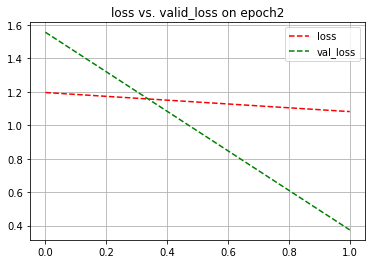

Epoch 3/50
4527/4527 [==============================] - 922s 204ms/step - loss: 0.9341 - accuracy: 0.7296 - val_loss: 0.7185 - val_accuracy: 0.7278

Epoch 00020: saving model to experiment\model20-valloss0.72-valacc.hdf5


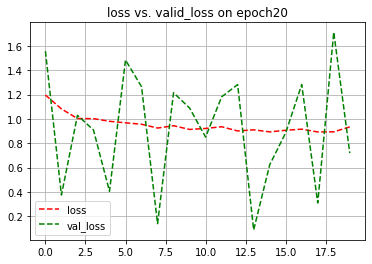

Epoch 21/50
4527/4527 [==============================] - 714s 158ms/step - loss: 0.9473 - accuracy: 0.7250 - val_loss: 1.2083 - val_accuracy: 0.7212

Epoch 00021: saving model to experiment\model21-valloss1.21-valacc.hdf5


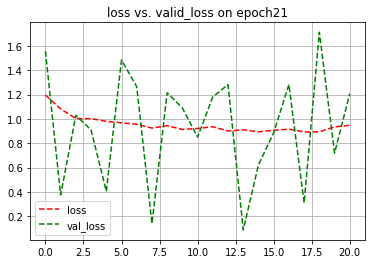

Epoch 22/50
4527/4527 [==============================] - 829s 183ms/step - loss: 0.9309 - accuracy: 0.7297 - val_loss: 1.0488 - val_accuracy: 0.7331

Epoch 00022: saving model to experiment\model22-valloss1.05-valacc.hdf5


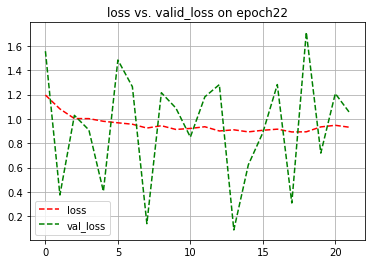

Epoch 23/50
4527/4527 [==============================] - 783s 173ms/step - loss: 0.9193 - accuracy: 0.7333 - val_loss: 1.2748 - val_accuracy: 0.7142

Epoch 00023: saving model to experiment\model23-valloss1.27-valacc.hdf5


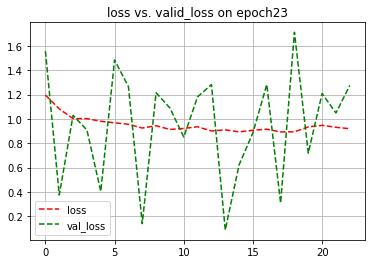

Epoch 24/50
4527/4527 [==============================] - 741s 164ms/step - loss: 0.9281 - accuracy: 0.7318 - val_loss: 0.6861 - val_accuracy: 0.7240

Epoch 00024: saving model to experiment\model24-valloss0.69-valacc.hdf5


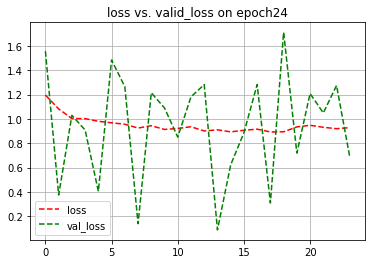

Epoch 25/50
4527/4527 [==============================] - 712s 157ms/step - loss: 0.9402 - accuracy: 0.7273 - val_loss: 1.1286 - val_accuracy: 0.7172

Epoch 00025: saving model to experiment\model25-valloss1.13-valacc.hdf5


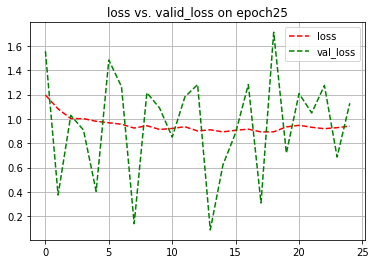

Epoch 26/50
4527/4527 [==============================] - 745s 164ms/step - loss: 0.9272 - accuracy: 0.7309 - val_loss: 2.4656 - val_accuracy: 0.7239

Epoch 00026: saving model to experiment\model26-valloss2.47-valacc.hdf5


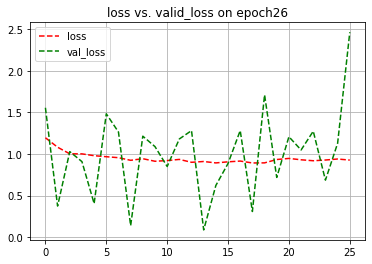

Epoch 27/50
4527/4527 [==============================] - 732s 162ms/step - loss: 0.9279 - accuracy: 0.7310 - val_loss: 1.1100 - val_accuracy: 0.7407

Epoch 00027: saving model to experiment\model27-valloss1.11-valacc.hdf5


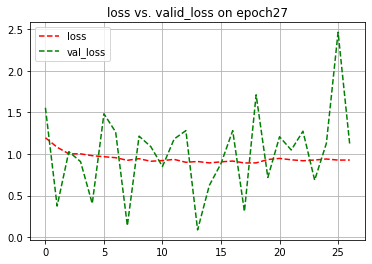

Epoch 28/50
4527/4527 [==============================] - 729s 161ms/step - loss: 0.9197 - accuracy: 0.7328 - val_loss: 0.9265 - val_accuracy: 0.7185

Epoch 00028: saving model to experiment\model28-valloss0.93-valacc.hdf5


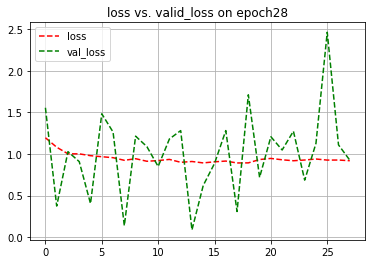

Epoch 29/50
4527/4527 [==============================] - 774s 171ms/step - loss: 0.9206 - accuracy: 0.7344 - val_loss: 1.3562 - val_accuracy: 0.7254

Epoch 00029: saving model to experiment\model29-valloss1.36-valacc.hdf5


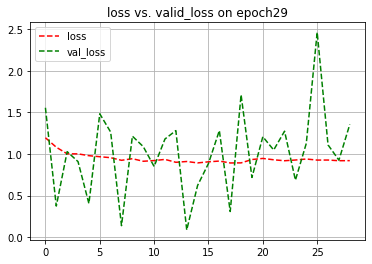

Epoch 30/50
4527/4527 [==============================] - 857s 189ms/step - loss: 0.9232 - accuracy: 0.7317 - val_loss: 1.6670 - val_accuracy: 0.7297

Epoch 00030: saving model to experiment\model30-valloss1.67-valacc.hdf5


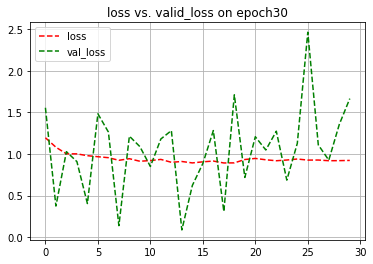

Epoch 31/50
4527/4527 [==============================] - 762s 168ms/step - loss: 0.9190 - accuracy: 0.7329 - val_loss: 1.3867 - val_accuracy: 0.7252

Epoch 00031: saving model to experiment\model31-valloss1.39-valacc.hdf5


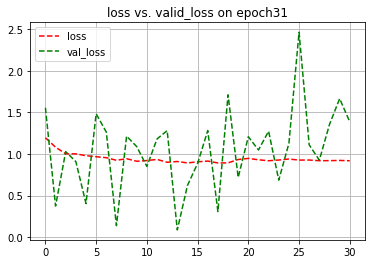

Epoch 32/50
4527/4527 [==============================] - 760s 168ms/step - loss: 0.9108 - accuracy: 0.7366 - val_loss: 0.5992 - val_accuracy: 0.7320

Epoch 00032: saving model to experiment\model32-valloss0.60-valacc.hdf5


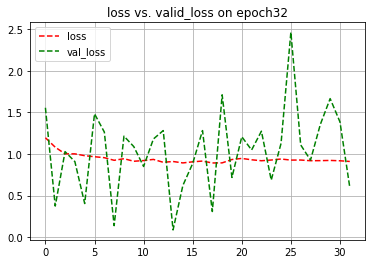

Epoch 33/50
4527/4527 [==============================] - 789s 174ms/step - loss: 0.9134 - accuracy: 0.7346 - val_loss: 0.6277 - val_accuracy: 0.7130

Epoch 00033: saving model to experiment\model33-valloss0.63-valacc.hdf5


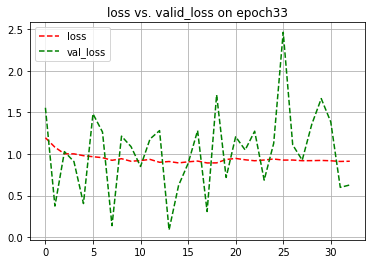

Epoch 34/50
4527/4527 [==============================] - 776s 171ms/step - loss: 0.9115 - accuracy: 0.7366 - val_loss: 0.8279 - val_accuracy: 0.7322

Epoch 00034: saving model to experiment\model34-valloss0.83-valacc.hdf5


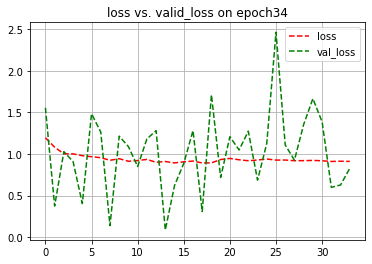

Epoch 35/50
4527/4527 [==============================] - 775s 171ms/step - loss: 0.9226 - accuracy: 0.7320 - val_loss: 1.2888 - val_accuracy: 0.7292

Epoch 00035: saving model to experiment\model35-valloss1.29-valacc.hdf5


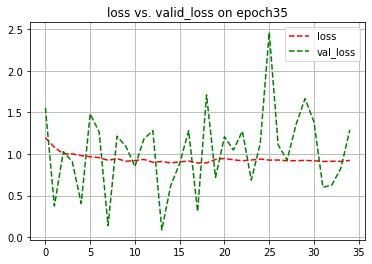

Epoch 36/50
4527/4527 [==============================] - 762s 168ms/step - loss: 0.9194 - accuracy: 0.7328 - val_loss: 0.6758 - val_accuracy: 0.7134

Epoch 00036: saving model to experiment\model36-valloss0.68-valacc.hdf5


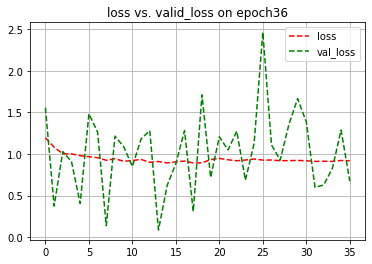

Epoch 37/50
4527/4527 [==============================] - 717s 158ms/step - loss: 0.9067 - accuracy: 0.7383 - val_loss: 1.3766 - val_accuracy: 0.7368

Epoch 00037: saving model to experiment\model37-valloss1.38-valacc.hdf5


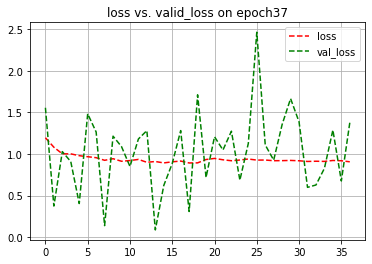

Epoch 38/50
4527/4527 [==============================] - 707s 156ms/step - loss: 0.9248 - accuracy: 0.7317 - val_loss: 1.0979 - val_accuracy: 0.7114

Epoch 00038: saving model to experiment\model38-valloss1.10-valacc.hdf5


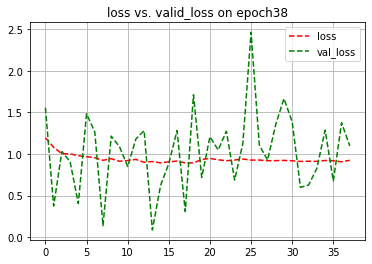

Epoch 39/50
4527/4527 [==============================] - 677s 150ms/step - loss: 0.9180 - accuracy: 0.7352 - val_loss: 1.4668 - val_accuracy: 0.7365

Epoch 00039: saving model to experiment\model39-valloss1.47-valacc.hdf5


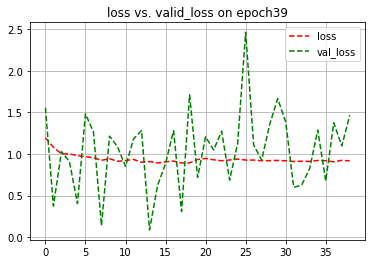

Epoch 40/50
4527/4527 [==============================] - 673s 149ms/step - loss: 0.9380 - accuracy: 0.7273 - val_loss: 0.5616 - val_accuracy: 0.7185

Epoch 00040: saving model to experiment\model40-valloss0.56-valacc.hdf5


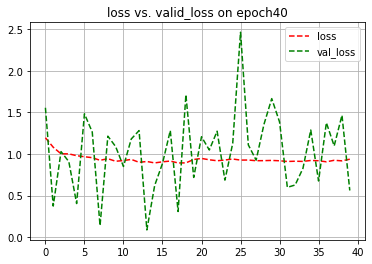

Epoch 41/50
4527/4527 [==============================] - 663s 146ms/step - loss: 0.9253 - accuracy: 0.7321 - val_loss: 1.4554 - val_accuracy: 0.7233

Epoch 00041: saving model to experiment\model41-valloss1.46-valacc.hdf5


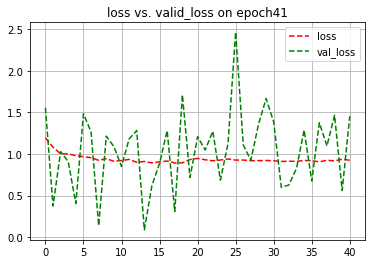

Epoch 42/50
4527/4527 [==============================] - 663s 146ms/step - loss: 0.9135 - accuracy: 0.7365 - val_loss: 0.3537 - val_accuracy: 0.7271

Epoch 00042: saving model to experiment\model42-valloss0.35-valacc.hdf5


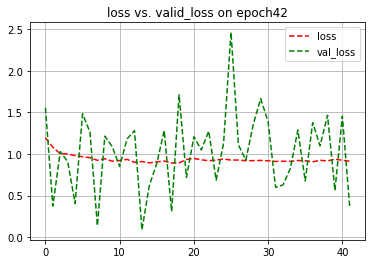

Epoch 43/50
4527/4527 [==============================] - 664s 147ms/step - loss: 0.9196 - accuracy: 0.7341 - val_loss: 1.1246 - val_accuracy: 0.7058

Epoch 00043: saving model to experiment\model43-valloss1.12-valacc.hdf5


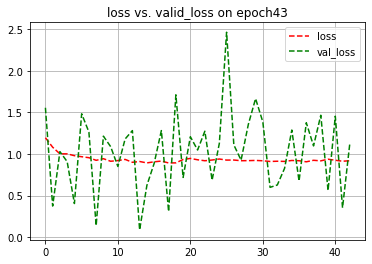

Epoch 44/50
4527/4527 [==============================] - 677s 150ms/step - loss: 0.9233 - accuracy: 0.7334 - val_loss: 0.9533 - val_accuracy: 0.7368

Epoch 00044: saving model to experiment\model44-valloss0.95-valacc.hdf5


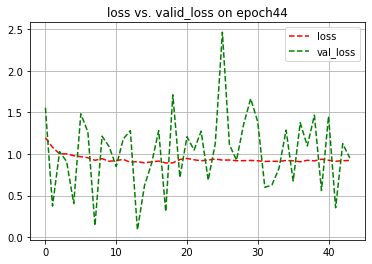

Epoch 45/50
4527/4527 [==============================] - 723s 160ms/step - loss: 0.9313 - accuracy: 0.7289 - val_loss: 0.1136 - val_accuracy: 0.7302

Epoch 00045: saving model to experiment\model45-valloss0.11-valacc.hdf5


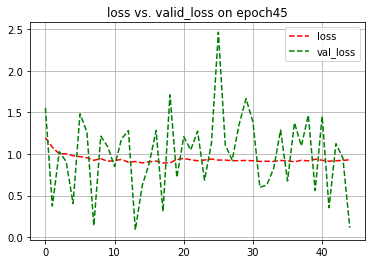

Epoch 46/50
4527/4527 [==============================] - 742s 164ms/step - loss: 0.9149 - accuracy: 0.7347 - val_loss: 1.9447 - val_accuracy: 0.7274

Epoch 00046: saving model to experiment\model46-valloss1.94-valacc.hdf5


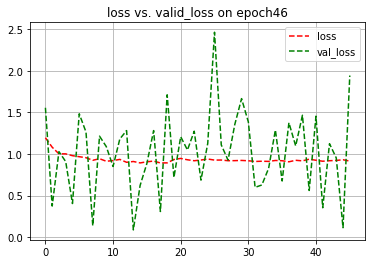

Epoch 47/50
4527/4527 [==============================] - 715s 158ms/step - loss: 0.9071 - accuracy: 0.7379 - val_loss: 1.3710 - val_accuracy: 0.7168

Epoch 00047: saving model to experiment\model47-valloss1.37-valacc.hdf5


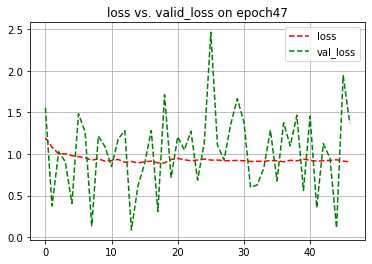

Epoch 48/50
4527/4527 [==============================] - 705s 156ms/step - loss: 0.9273 - accuracy: 0.7317 - val_loss: 1.0069 - val_accuracy: 0.7238

Epoch 00048: saving model to experiment\model48-valloss1.01-valacc.hdf5


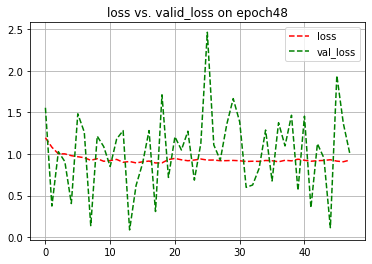

Epoch 49/50
4527/4527 [==============================] - 724s 160ms/step - loss: 0.9086 - accuracy: 0.7377 - val_loss: 0.9944 - val_accuracy: 0.7365

Epoch 00049: saving model to experiment\model49-valloss0.99-valacc.hdf5


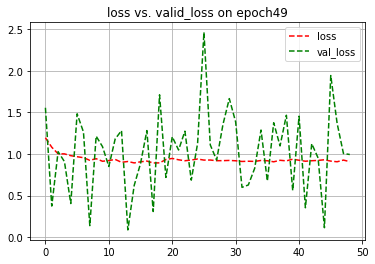

Epoch 50/50
4527/4527 [==============================] - 718s 159ms/step - loss: 0.9214 - accuracy: 0.7329 - val_loss: 1.2168 - val_accuracy: 0.7356

Epoch 00050: saving model to experiment\model50-valloss1.22-valacc.hdf5


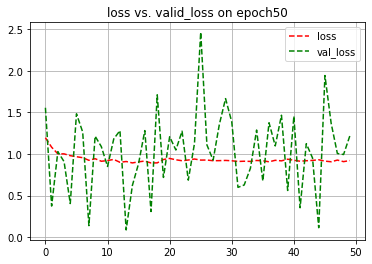

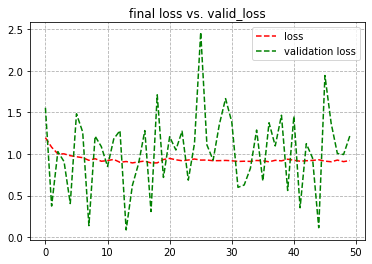

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [66]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 15 11:16:10 2018
@author: fj123
@description: Use this script to train the model~=v=~
"""

import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Flatten, Dropout, TimeDistributed, Reshape, Lambda
from keras.layers import LSTM
from keras.optimizers import RMSprop, Adam, SGD
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, Callback
import numpy as np
import matplotlib.pyplot as plt
import utils

# define constants
NUMBER_FEATURES_OCTAVE = utils.NUMBER_FEATURES_OCTAVE # 12 midi_notes + sustain + rest + beat_start
NUMBER_FEATURES = utils.NUMBER_FEATURES # 128 midi_notes + sustain + rest + beat_start
INSTRUMENTS = utils.INSTRUMENTS # number of instruments in midifile

# parameters setting =v=
num_steps = 32
batch_size = 256
skip_step = 3
lr = 0.001
dropout = 0.4
decay_rate = 0.1 ** 6
vocabulary = 14
embedding_size = 16
hidden_size = 64
num_epochs = 50

# paths for training and validation data, experiment path for saving figures and models
train_data_path = 'data\\train'
valid_data_path = 'data\\validation'
experiment_path = 'experiment\\'

# load the training data from the encoded .npy files.
train_data = utils.reload_data_all(train_data_path)
valid_data = utils.reload_data_all(valid_data_path)


# this is the batch generator for generating data during model training.
class KerasBatchGenerator(object):
    
    ###########################################################################
    # data shape:
    #   (number_of_files)(INSTRUMENTS, number_of_ts_in_midi, NUMBER_FEATRUES_OCTAVE)
    # num_steps:
    #   the number of time steps in one unrolled LSTM model
    # batch_size:
    #   number of samples in one mini-batch
    # vocabulary:
    #   number of categories in output
    # skip_step:
    #   steps to skip when generate the training samples
    ###########################################################################
    
    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=3):
        # save the variables, indexes
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        self.current_index = 0 # index of t in current midifile
        self.file_index = 0 # the index of current midifile
        self.skip_step = skip_step
        
        
    # generate function called at the beginning of each batch, yield input and output data
    def generate(self):
        # define dimensions for inputs and outputs
        x = np.zeros((self.batch_size, self.num_steps, INSTRUMENTS * NUMBER_FEATURES_OCTAVE), dtype=np.bool)
        y = np.zeros((self.batch_size, self.num_steps, self.vocabulary), dtype=np.bool)
        
        while True:
            for i in range(self.batch_size):
                # the ith sample in the current batch
                
                if self.current_index + self.num_steps >= len(self.data[self.file_index][0]):
                    self.current_index = 0
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                while len(self.data[self.file_index][0]) < self.num_steps:
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                # set values for input and output data
                x[i, :, :NUMBER_FEATURES_OCTAVE] = self.data[self.file_index][0, self.current_index : self.current_index + self.num_steps, :]
                x[i, 1:, NUMBER_FEATURES_OCTAVE:] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps - 1, :]
                y[i, :, :] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps, :self.vocabulary]
                
                self.current_index += self.skip_step
                
            yield x, y


# train and validation data batch generators.
train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)


# define model structure
model = Sequential()
model.add(Dropout(dropout, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS)))
model.add(TimeDistributed(Dense(embedding_size)))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(dropout))
model.add(TimeDistributed(Dense(vocabulary)))
model.add(Activation('softmax'))
optimizer = Adam(lr=lr, decay=decay_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(model.summary())

# save model at end of each epoch
#checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc{val_acc:.2f}.hdf5', verbose=1)
checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc.hdf5', verbose=1)

# plot losses at the end of each epoch
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.logs = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        plt.figure()
        plt.plot(self.x, self.losses, 'r--', label='loss')
        plt.plot(self.x, self.val_losses, 'g--', label='val_loss')
        plt.title('loss vs. valid_loss on epoch{}'.format(self.i))
        plt.legend()
        plt.grid()
        plt.savefig(experiment_path + 'loss vs.valid_loss epoch{}.svg'.format(self.i), format='svg')
        plt.show()
        
plot_losses = PlotLosses()

# calculate the number of steps needed for each epoch (one step per batch)
steps_per_epoch = 0
for i in range(len(train_data)):
    steps_per_epoch += len(train_data[i][0] - num_steps) // (batch_size * skip_step)
validation_steps = 0
for i in range(len(valid_data)):
    validation_steps += len(valid_data[i][0] - num_steps) // (batch_size * skip_step)


# model training!
His = model.fit_generator(train_data_generator.generate(), steps_per_epoch, num_epochs,
                    validation_data=valid_data_generator.generate(),
                    validation_steps=validation_steps,
                    callbacks=[checkpointer, plot_losses])

# plot losses in the end.
plt.figure()
plt.plot(His.history['loss'], 'r--', label='loss')
plt.plot(His.history['val_loss'], 'g--', label='validation loss')
plt.title('final loss vs. valid_loss')
plt.legend()
plt.grid(linestyle = "--")
plt.savefig(experiment_path + 'final loss vs. valid_loss.svg', format='svg')
plt.show()

# plot accuracies in the end~
plt.figure()
plt.plot(His.history['acc'], 'r--', label='accuracy')
plt.plot(His.history['val_acc'], 'g--', label='validation accuracy')
plt.title('final accuracy vs. valid_accuracy')
plt.legend()
plt.grid(linestyle = "--")
plt.savefig(experiment_path + 'final accuracy vs. valid_accuracy.svg', format='svg')
plt.show()

# save losses and accuracies during training~
np.save(experiment_path + 'History.loss.npy', His.history['loss'])
np.save(experiment_path + 'History.val_loss.npy', His.history['val_loss'])
np.save(experiment_path + 'History.acc.npy', His.history['acc'])
np.save(experiment_path + 'History.val_acc.npy', His.history['val_acc'])

# save the final model at the last epoch
model.save(experiment_path + 'final_model.hdf5')



# Generate from a midi input

In [86]:
# define constants
NUMBER_FEATURES_OCTAVE = utils.NUMBER_FEATURES_OCTAVE # 12 midi_notes + sustain + rest + beat_start
NUMBER_FEATURES = utils.NUMBER_FEATURES # 128 midi_notes + sustain + rest + beat_start
INSTRUMENTS = utils.INSTRUMENTS # number of instruments in midifile
num_steps = 32
vocabulary = 14

Specify parameters:  
Also, since the model in the 45th epoch returned the best results, we have used it for generation (not the final version at epoch 50)

In [103]:
args = easydict.EasyDict({
        "midi_file": 'ABBA.mid',
        "model_file": 'model45-valloss0.11-valacc.hdf5',
        "ignore": [], #if we want to ignore the drums track, it is usually 9
        "diversity": 1
    })

midi_file = args.midi_file
model_file = args.model_file
diversity = args.diversity
#diversity = 1

In [104]:
# load the deep learning model and data for the melodeis
model = load_model(model_file)
test_data_raw = utils.load_melody_data(midi_file)
utils.to_monophonic(test_data_raw)
test_data = utils.to_octave(test_data_raw)

----load melody data from midifile: ABBA.mid
convert music into monophonic...
convert music into within one octave...


Remember to change diversity here too:

In [105]:
# sample a note from the probability distribution.
# This helper function is copied from keras lstm examples at:
# https://github.com/keras-team/keras/blob/master/examples/lstm_text_generation.py
def sample(prediction, diversity=1):
    prediction = np.asarray(prediction).astype('float64')
    prediction = np.log(prediction) / diversity
    prediction_exp = np.exp(prediction)
    prediction = prediction_exp / np.sum(prediction_exp)
    probs = np.random.multinomial(1, prediction, 1)
    return np.argmax(probs)

In [106]:
# generate accompaniment from left to right.
test_data[1, num_steps:, :] = 0
i = 0
while i + num_steps < len(test_data[0]):
    x = np.zeros((1, num_steps, INSTRUMENTS * NUMBER_FEATURES_OCTAVE), dtype=np.bool)
    x[:, :, :NUMBER_FEATURES_OCTAVE] = test_data[0, i : i + num_steps, :]
    x[:, 1:, NUMBER_FEATURES_OCTAVE:] = test_data[1, i : i + num_steps - 1, :]
    
    prediction = model.predict(x)
    # predict_note = np.argmax(prediction[0, num_steps - 1, :])
    predict_note = sample(prediction[0, num_steps - 1, :], diversity)
    
    test_data[1, i + num_steps - 1, predict_note] = 1
    
    i += 1
    
data = utils.reverse_octave(test_data)

# combine the generated accompaniment with the original melodeis.
data_new = np.copy(test_data_raw)
data_new[1, :, :] = data[1, :, :]

# print the generated new music piece and save the music into midi file.
utils.print_data(data_new)
utils.generate_midi(data_new, midi_file[:len(midi_file)-4] + '-generate-' + model_file[:len(model_file)-5] + '-{}.mid'.format(diversity))


convert music within octave back into full piano roll...
*********************************
melody for the data is:
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  

00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  

00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  

00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  00  00  00  00  B3  --  00  00  

00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  
B3  00  00  00  B3  00  00  00  00  00  00  00  G3  --  00  00  

00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  
--  --  00  00  B3  --  00  00  B3  --  00  00  C#3 --  00  00  

00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  
A#3 --  00  00  G3  --  00  00  F3

00  00  00  00  D5  00  D5  00  E5  --  F#5 00  E5  00  D5  00  
00  00  F3  --  00  00  F3  --  00  00  00  00  F3  --  00  00  

00  00  00  00  E5  00  00  00  D5  --  00  00  00  00  G5  --  
F3  00  00  00  F3  00  00  F3  C3  --  --  --  00  00  D3  --  

00  00  G5  00  G5  00  G5  00  F#5 --  00  00  D5  --  00  00  
G3  --  00  --  G3  --  00  00  D3  --  00  00  A3  --  --  00  

00  00  00  00  E5  00  D5  00  E5  --  D5  00  00  00  00  00  
D3  --  00  00  C3  --  00  00  F3  --  A#3 --  --  --  --  --  

00  00  00  00  D5  00  D5  00  E5  --  F#5 00  E5  --  D5  00  
--  00  00  00  G3  --  00  00  G#3 --  00  00  F3  --  B3  00  

00  00  00  00  E5  --  00  00  D5  --  00  00  00  00  G5  --  
C#3 --  00  00  A3  --  00  00  D3  --  00  00  C#3 --  00  00  

00  00  G5  00  G5  00  G5  00  F#5 --  00  00  D5  --  00  00  
F#3 --  00  00  D3  --  00  00  C#3 --  00  00  E3  --  00  00  

00  00  00  00  A5  --  --  --  --  --  A5  00  A5  00  A5  --  
D3  --  00  00  D3